Loading and cleaning data...
Creating engineered features...
Data cleaning completed. Dataset shape: (31169, 53)
Processing five-set matches...
Number of five-set matches: 14347
Calculating 5-match rolling averages for player statistics...
Five-set match processing completed. Dataset shape: (10982, 47)
Analyzing Grand Slam matches...
Number of Grand Slam matches: 10896


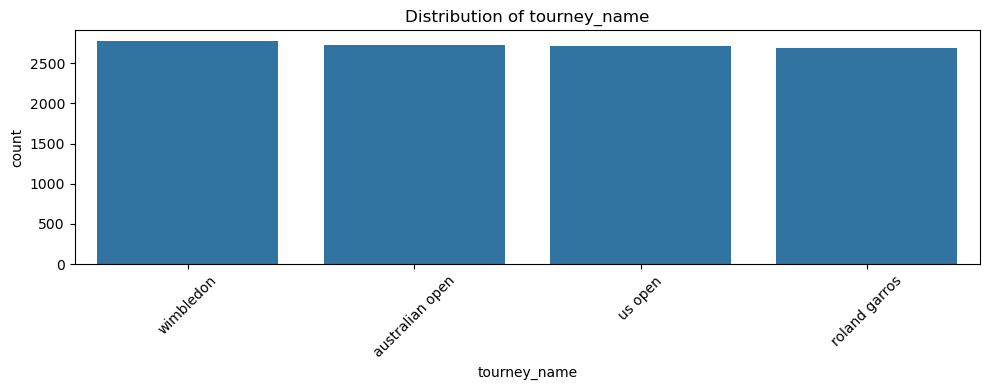

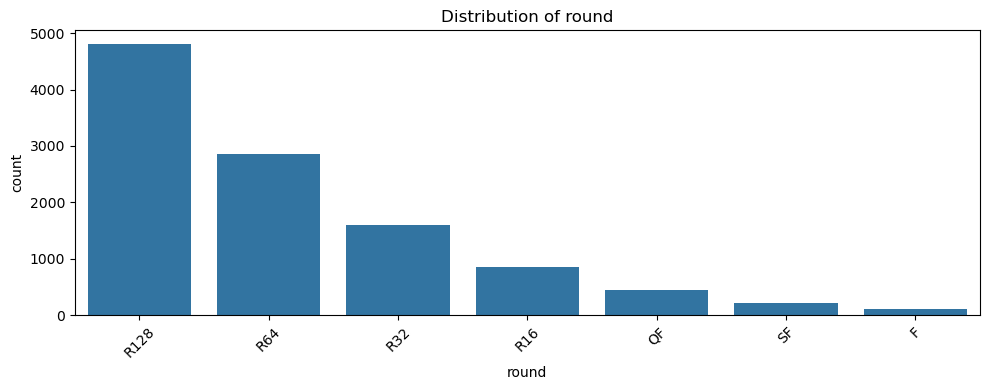

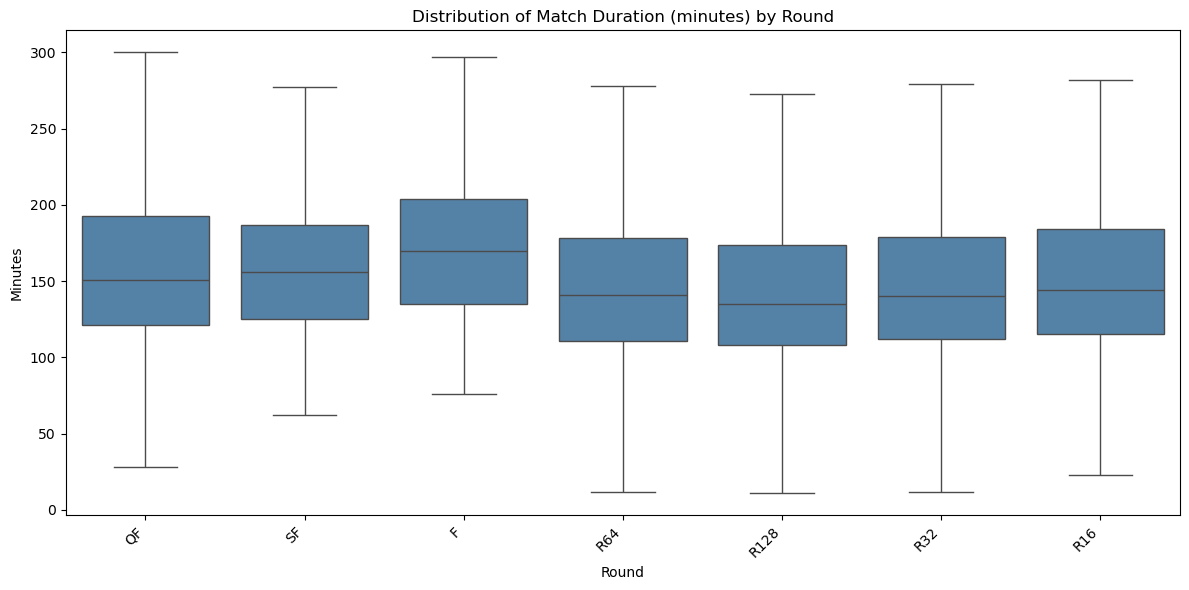

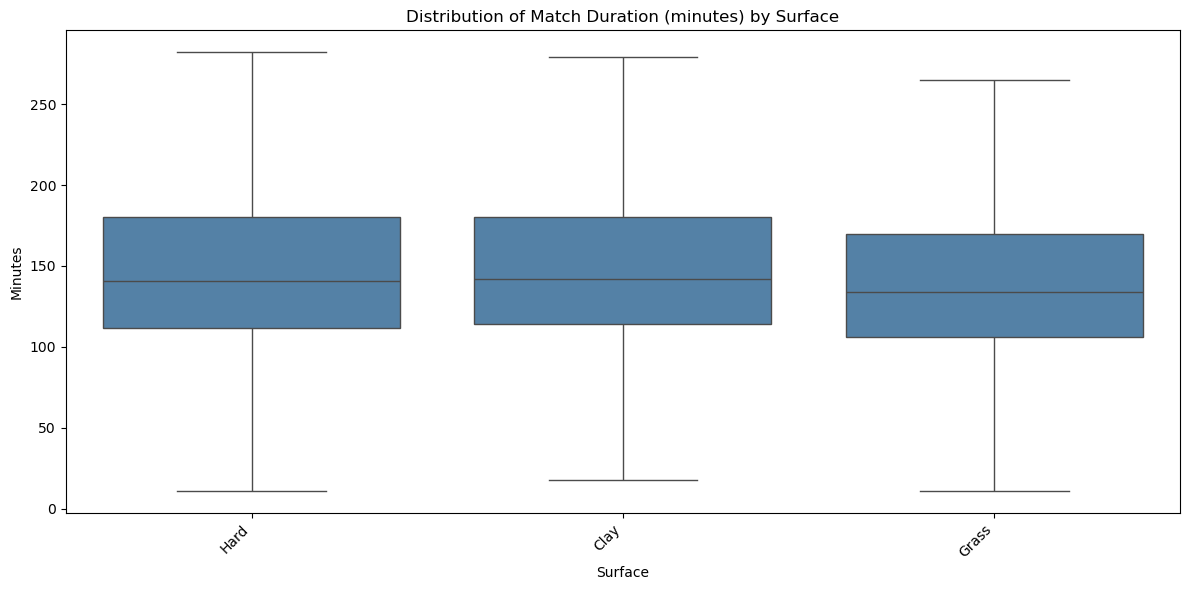

/home/cord2108/ITAM/Aplicada/Proyecto_final/Grand Slam/limpieza.py:317: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/cord2108/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


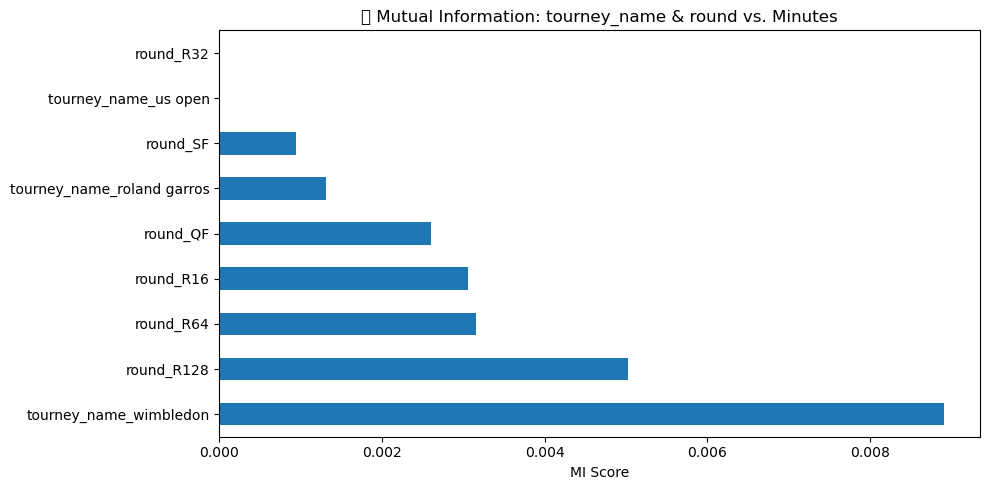

🏆 Random Forest Feature Importances (numerical vars only):
loser_rank_points         → 0.0750
match_num                 → 0.0446
winner_age                → 0.0390
winner_rank_points        → 0.0380
l_avg_ace                 → 0.0375
w_avg_ace                 → 0.0357
l_avg_2ndWon              → 0.0354
avg_age                   → 0.0349
loser_age                 → 0.0348
age_diff                  → 0.0347
w_avg_2ndWon              → 0.0337
w_avg_df                  → 0.0307
l_avg_1stWon              → 0.0304
l_avg_bpFaced             → 0.0301
rank_diff                 → 0.0298
l_avg_1stIn               → 0.0295
l_avg_df                  → 0.0295
w_avg_1stIn               → 0.0288
w_avg_1stWon              → 0.0287
loser_rank                → 0.0286
l_avg_svpt                → 0.0285
avg_rank                  → 0.0267
l_avg_bpSaved             → 0.0266
w_avg_bpFaced             → 0.0261
w_avg_svpt                → 0.0261
w_avg_bpSaved             → 0.0250
l_avg_SvGms               → 0.0

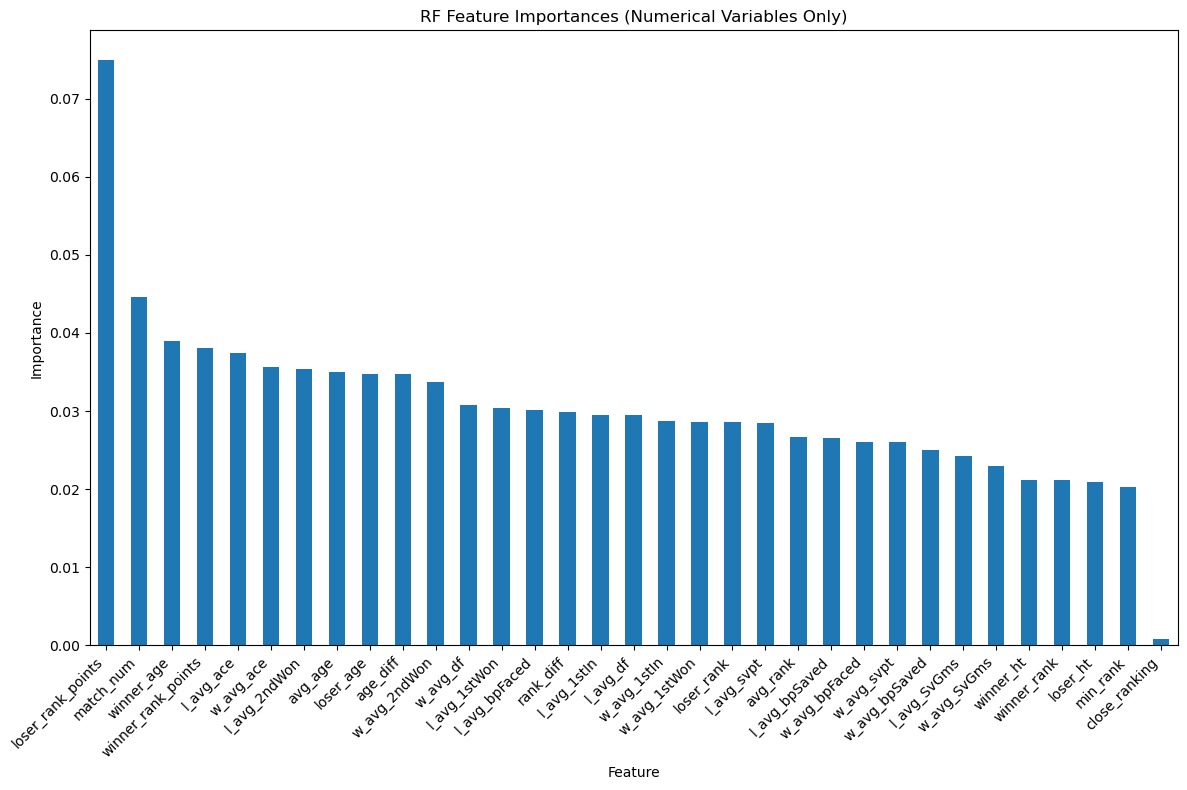

✅ surface found — dtype: object, unique values: 3

🔄 Applying one-hot encoding...
✅ One-hot encoding successful.

📐 Shape after encoding: (10896, 35)
🧼 Column types: float64    34
int64       1
Name: count, dtype: int64

✅ All columns are numeric and ready for modeling.
✅ Rows after dropping NaNs: 10848
✅ Rows after removing outliers: 10746


/home/cord2108/miniconda3/envs/myenv/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



📊 VIF Scores (Numerical Features Only):
               feature          VIF
2           winner_age          inf
4            loser_age          inf
5          winner_rank          inf
7           loser_rank          inf
9            rank_diff          inf
10            avg_rank          inf
11            min_rank          inf
13             avg_age          inf
0                const  2684.498516
17          w_avg_svpt    83.972742
26          l_avg_svpt    78.082695
28        l_avg_1stWon    61.207012
23       w_avg_bpFaced    58.173092
19        w_avg_1stWon    55.970403
32       l_avg_bpFaced    53.711661
18         w_avg_1stIn    31.334155
27         l_avg_1stIn    29.594401
22       w_avg_bpSaved    26.181269
31       l_avg_bpSaved    25.499235
29        l_avg_2ndWon    20.442511
20        w_avg_2ndWon    20.165281
30         l_avg_SvGms    14.817457
21         w_avg_SvGms    13.595108
24           l_avg_ace     3.299746
15           w_avg_ace     3.270575
16            w_avg_df 

winner_ht  loser_ht  ...  surface_Hard  minutes
120        188.0     170.0  ...           1.0     88.0
121        188.0     180.0  ...           1.0    147.0
122        183.0     178.0  ...           1.0    204.0
123        190.0     190.0  ...           1.0    111.0
124        188.0     188.0  ...           1.0    242.0
...          ...       ...  ...           ...      ...
14341      183.0     196.0  ...           1.0    156.0
14343      188.0     188.0  ...           1.0    156.0
14344      183.0     198.0  ...           1.0    180.0
14345      185.0     188.0  ...           1.0    259.0
14346      185.0     183.0  ...           1.0    200.0

[10746 rows x 13 columns]

In [1]:
from limpieza import main 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

file_path = "/home/cord2108/ITAM/Aplicada/Proyecto_final/atp_data/atp_matches_till_2022.csv"
final_data = main(file_path, show_plots=True)

display(final_data)

In [2]:
best_of_five = final_data.copy()

In [3]:
from scipy import stats

# Normality tests for best_of_five
print("\nBest of 5:")
shapiro_5 = stats.shapiro(best_of_five["minutes"])
dagostino_5 = stats.normaltest(best_of_five["minutes"])
print(f"Shapiro-Wilk Test: statistic={shapiro_5.statistic:.4f}, p-value={shapiro_5.pvalue:.4f}")
print(f"D'Agostino-Pearson Test: statistic={dagostino_5.statistic:.4f}, p-value={dagostino_5.pvalue:.4f}")



Best of 5:
Shapiro-Wilk Test: statistic=0.9818, p-value=0.0000
D'Agostino-Pearson Test: statistic=277.9218, p-value=0.0000


/home/cord2108/miniconda3/envs/myenv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10746.
  res = hypotest_fun_out(*samples, **kwds)


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols_5 = best_of_five.select_dtypes(include='number')

corr_matrix_5 = numeric_cols_5.corr()

correlations_with_minutes_5 = corr_matrix_5["minutes"].sort_values(key=abs, ascending=False)

print("\nTop correlations with 'minutes' (Best of 5):")
print(correlations_with_minutes_5)



Top correlations with 'minutes' (Best of 5):
minutes               1.000000
loser_rank_points     0.174237
close_ranking         0.099891
surface_Grass        -0.072030
l_avg_ace             0.062968
winner_rank_points   -0.058852
loser_ht              0.048247
surface_Hard          0.031945
l_avg_df             -0.030858
w_avg_ace            -0.020750
w_avg_df              0.011282
winner_ht            -0.005342
age_diff              0.002467
Name: minutes, dtype: float64


# Aqui solo nos vamos a enfocar en los grand slams

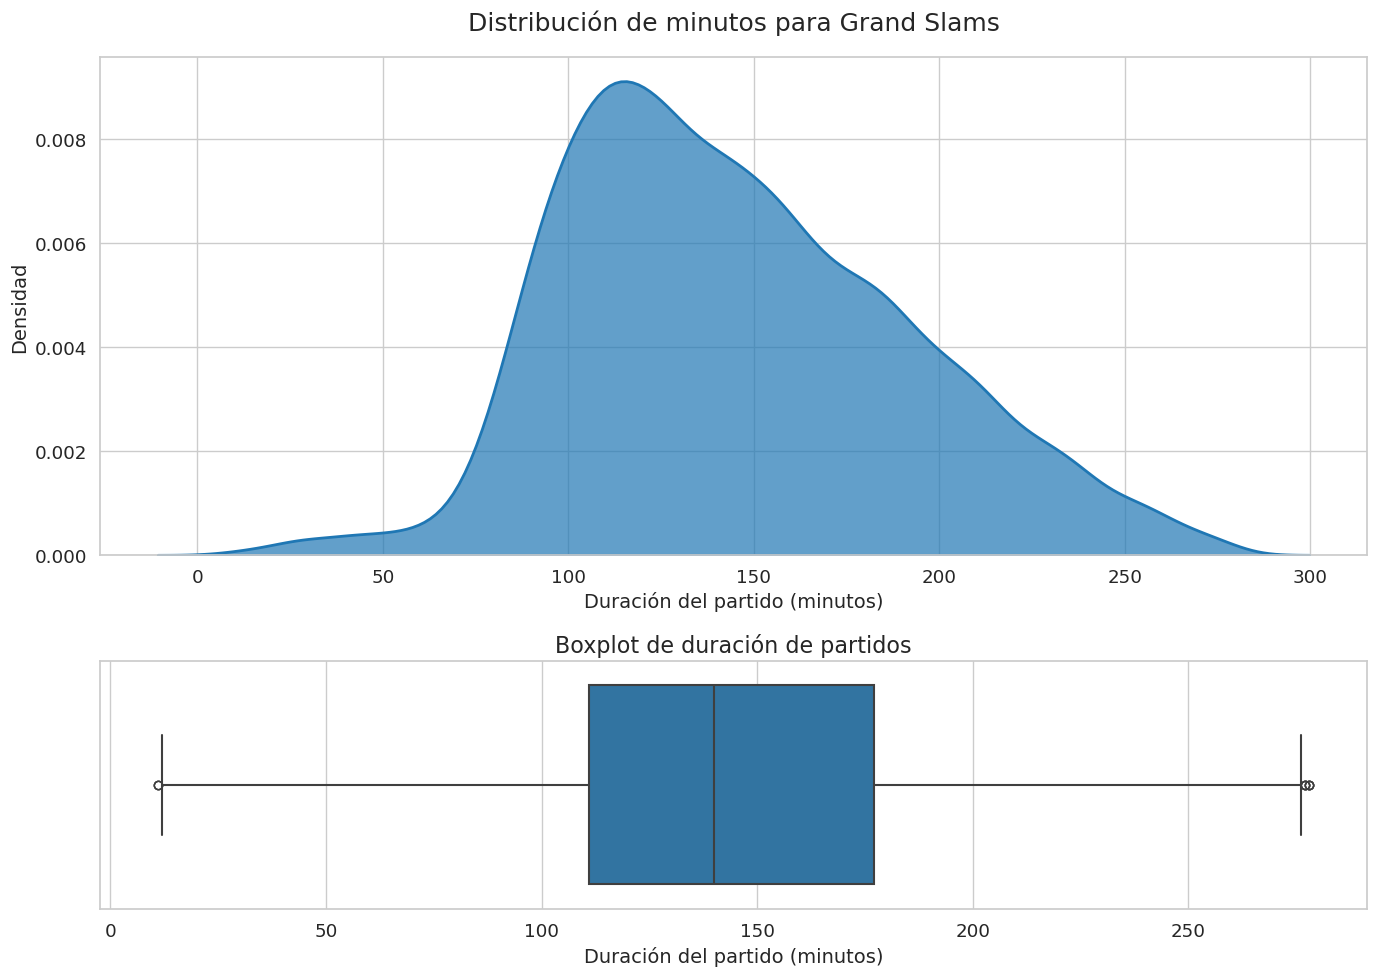

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.2)

# === KDE and Box Plot side-by-side ===
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), gridspec_kw={'height_ratios': [2, 1]})

# === KDE Plot ===
sns.kdeplot(
    data=best_of_five, 
    x="minutes", 
    fill=True, 
    color="#1f77b4", 
    linewidth=2, 
    alpha=0.7, 
    ax=axes[0]
)
axes[0].set_title("Distribución de minutos para Grand Slams", fontsize=18, pad=20)
axes[0].set_xlabel("Duración del partido (minutos)", fontsize=14)
axes[0].set_ylabel("Densidad", fontsize=14)

# === Box Plot ===
sns.boxplot(
    data=best_of_five, 
    x="minutes", 
    color="#1f77b4", 
    linewidth=1.5, 
    ax=axes[1]
)
axes[1].set_xlabel("Duración del partido (minutos)", fontsize=14)
axes[1].set_title("Boxplot de duración de partidos", fontsize=16)

plt.tight_layout()
plt.show()


# Modelo regresion lineal

                            OLS Regression Results                            
Dep. Variable:                minutes   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     48.58
Date:                Tue, 20 May 2025   Prob (F-statistic):          7.24e-114
Time:                        22:03:50   Log-Likelihood:                -56170.
No. Observations:               10746   AIC:                         1.124e+05
Df Residuals:                   10733   BIC:                         1.125e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                114.0512     20

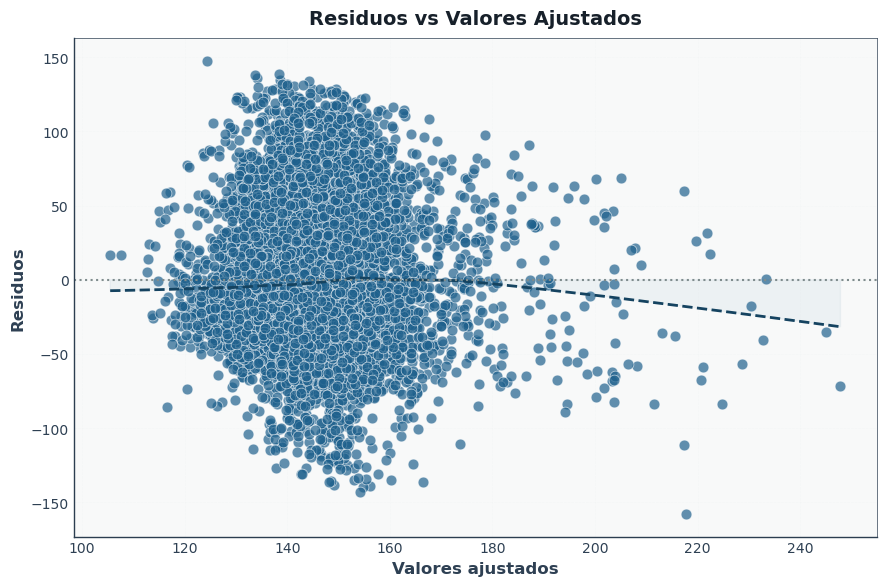

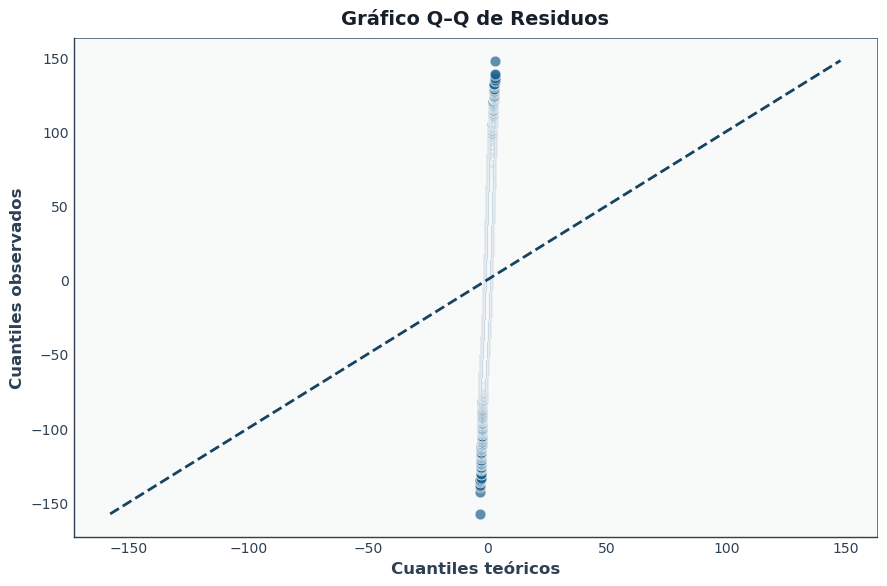

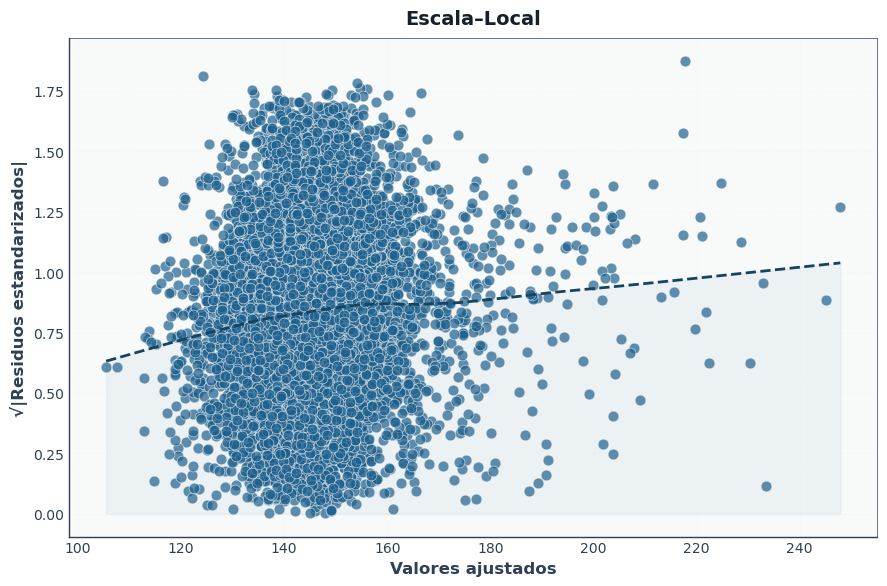

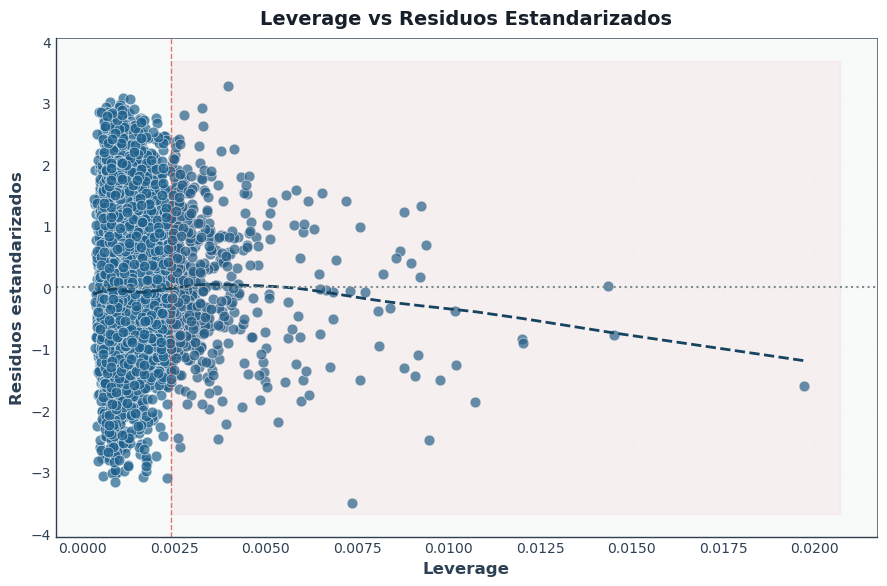

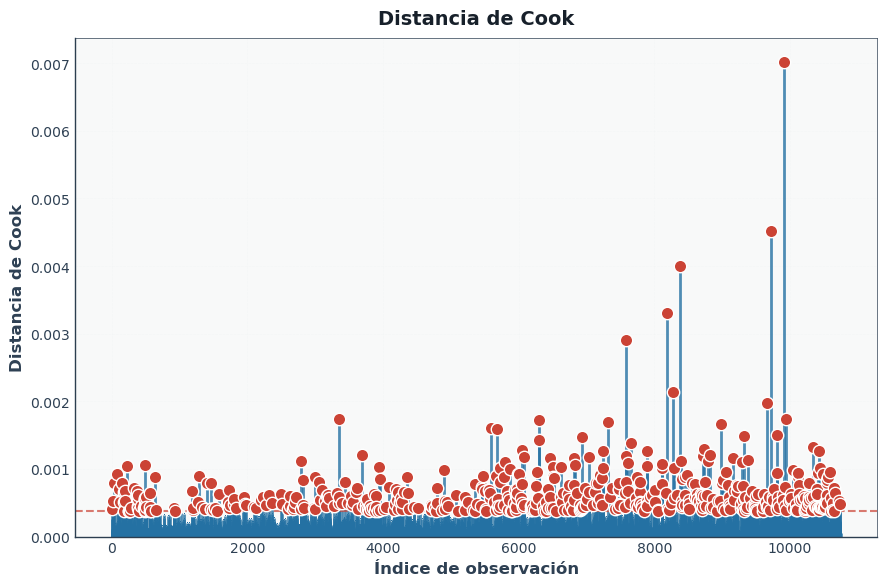

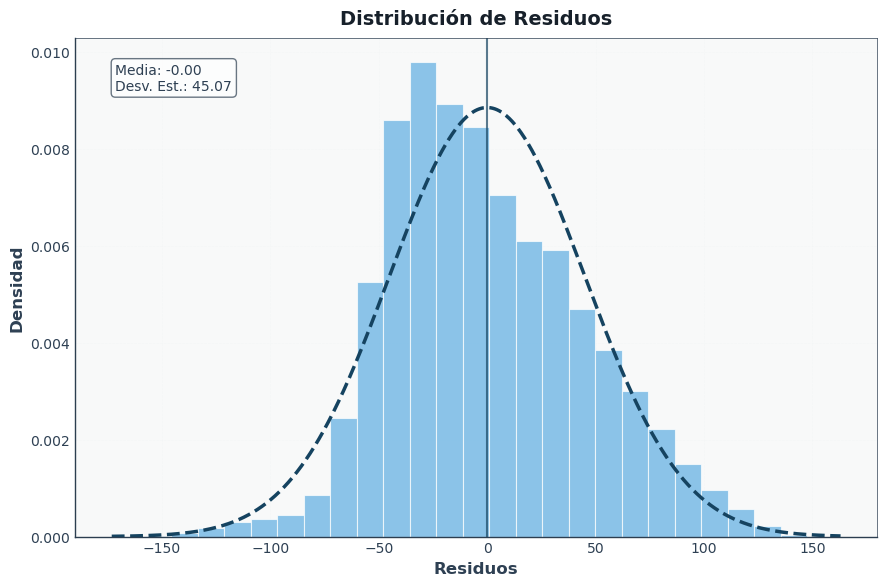

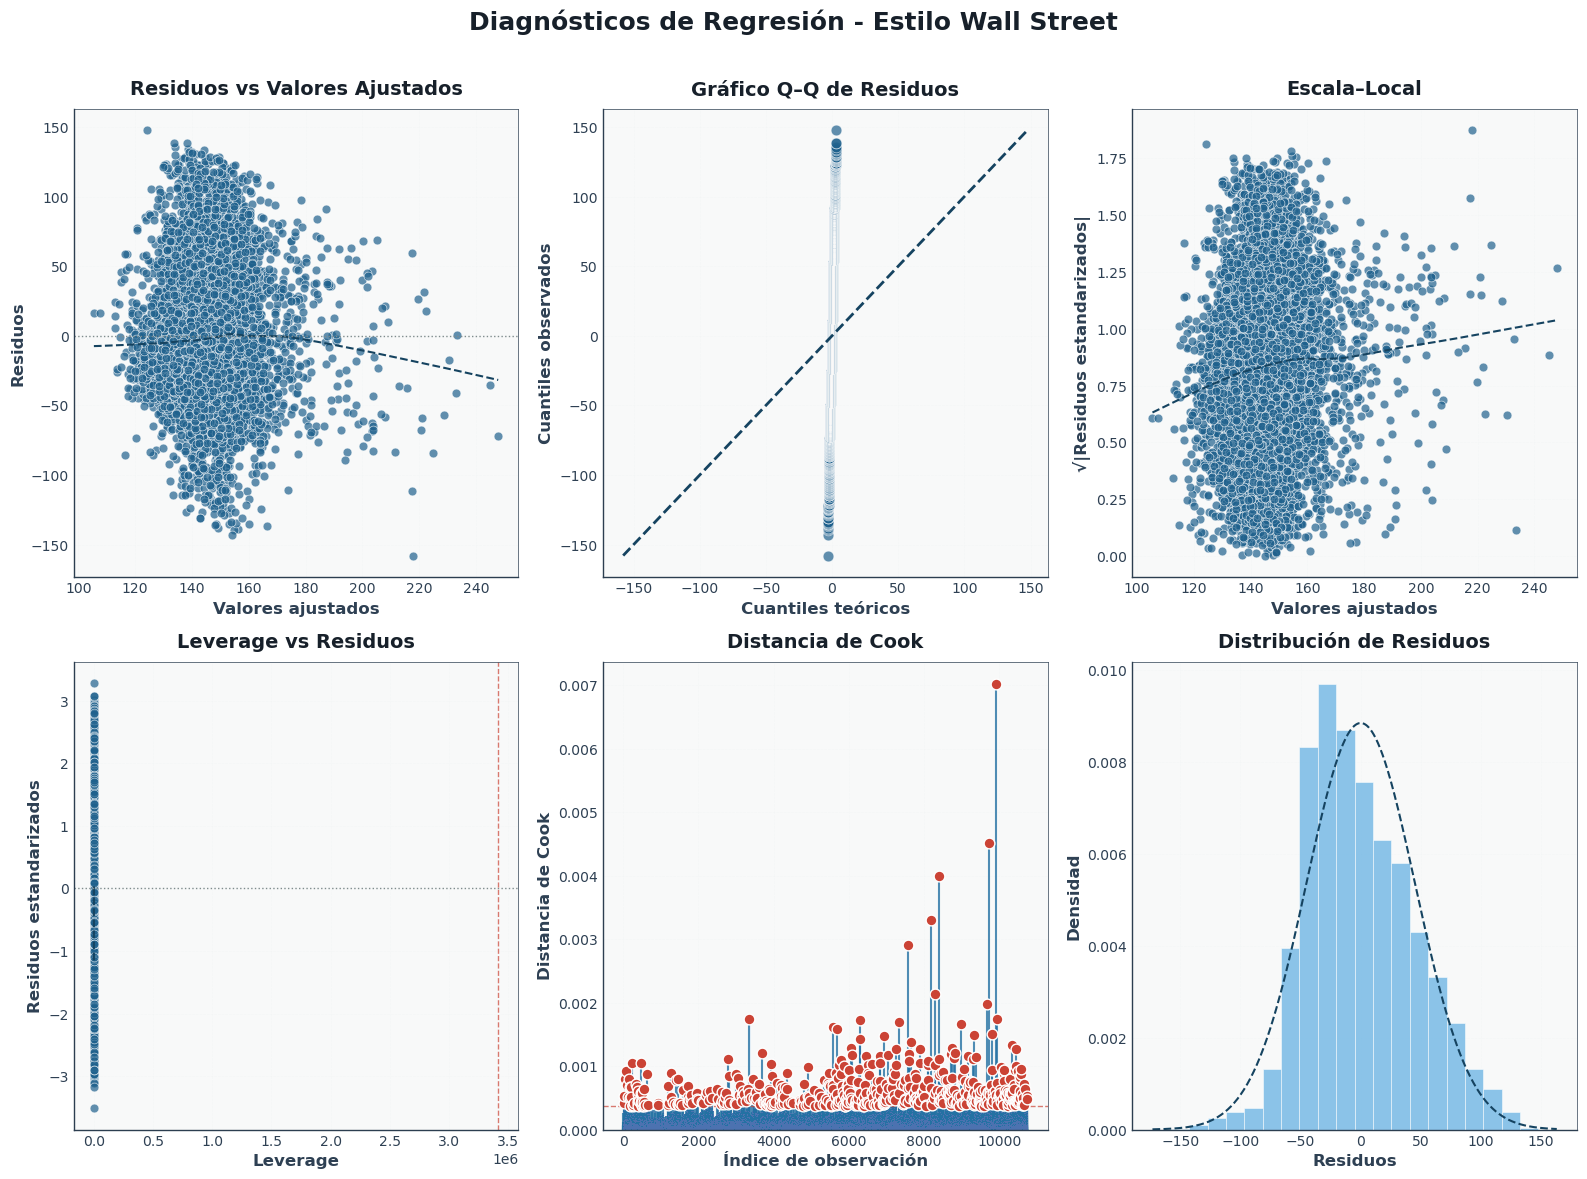

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence
from scipy import stats
import matplotlib as mpl
from matplotlib.gridspec import GridSpec

# === Configuración de estilo "Wall Street" mejorado ===
plt.style.use('seaborn-v0_8-whitegrid')  # Base estilo seaborn como punto de partida

# Configuración de fuentes más profesionales - usando fuentes genéricas disponibles en todos los sistemas
plt.rcParams.update({
    'font.family': 'sans-serif',  # Cambiado de 'serif' a 'sans-serif' que está más disponible
    'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'],
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 16,
    'figure.dpi': 100,
    'figure.figsize': (8, 5),
    'axes.facecolor': 'white',
    'axes.edgecolor': '#2E4053',
    'axes.labelcolor': '#2E4053',
    'axes.grid': True,
    'grid.color': '#ECF0F1',
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    'xtick.color': '#2E4053',
    'ytick.color': '#2E4053',
    'text.color': '#2E4053',
    'figure.facecolor': 'white',
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1
})

# Paleta de azules para estilo financiero/Wall Street
col = {
    'puntos': '#1F618D',       # Azul oscuro para puntos
    'puntos_alpha': 0.7,       # Transparencia
    'lowess': '#154360',       # Azul más oscuro para líneas de tendencia
    'hist': '#5DADE2',         # Azul medio para histogramas
    'stem': '#2471A3',         # Azul intenso para gráficos de tallo
    'linea_cero': '#7F8C8D',   # Gris para líneas de referencia
    'titulo': '#17202A',       # Casi negro para títulos
    'grid': '#ECF0F1',         # Gris muy claro para cuadrículas
    'borde': '#2C3E50',        # Azul oscuro para bordes
    'fondo_panel': '#F8F9F9'   # Gris muy claro para fondo de paneles
}

# Estilo común para todos los gráficos
def estilo_comun(ax, titulo):
    """Aplica estilo común a todos los gráficos"""
    ax.set_facecolor(col['fondo_panel'])
    ax.spines['bottom'].set_color(col['borde'])
    ax.spines['left'].set_color(col['borde'])
    ax.spines['top'].set_color(col['borde'])
    ax.spines['right'].set_color(col['borde'])
    ax.spines['top'].set_linewidth(0.5)
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(1.0)
    ax.spines['left'].set_linewidth(1.0)
    ax.tick_params(axis='both', which='major', direction='in', length=5)
    ax.grid(True, alpha=0.3)
    ax.set_title(titulo, fontweight='bold', color=col['titulo'], pad=10)

# === Paso 1: Preparar datos y ajustar modelo OLS ===
df = best_of_five.copy()
y = df['minutes']
X = df.drop(columns=['minutes'])
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

# === Paso 2: Resumen + Durbin–Watson ===
print(model.summary())
print(f"Durbin–Watson: {sms.durbin_watson(model.resid):.3f}")

# === Paso 3: Cálculos diagnósticos ===
fitted = model.fittedvalues
resid = model.resid
std_resid = model.get_influence().resid_studentized_internal
leverage = model.get_influence().hat_matrix_diag
influencia = OLSInfluence(model)
# Convertir a array de NumPy para evitar problemas de indexación
cooks = np.array(influencia.cooks_distance[0])

# === Paso 4: VIF ===
vif = pd.DataFrame({
    'Variable': X_const.columns,
    'VIF': [variance_inflation_factor(X_const.values, i)
            for i in range(X_const.shape[1])]
})
print("\nFactores de Inflación de Varianza:")
print(vif.round(2))

# === Paso 5: Gráficos diagnósticos mejorados ===

# 1. Residuos vs Ajustados
plt.figure(figsize=(9, 6))
ax = plt.subplot(111)
scatter = ax.scatter(fitted, resid, alpha=col['puntos_alpha'], color=col['puntos'], 
                    s=60, edgecolor='white', linewidth=0.5)
low = sm.nonparametric.lowess(resid, fitted)
ax.plot(low[:,0], low[:,1], color=col['lowess'], linestyle='--', linewidth=2)
ax.axhline(0, color=col['linea_cero'], linestyle=':', linewidth=1.5)
ax.set_xlabel("Valores ajustados", fontweight='bold')
ax.set_ylabel("Residuos", fontweight='bold')
estilo_comun(ax, "Residuos vs Valores Ajustados")

# Añadir efecto de sombreado para destacar
ax.fill_between(low[:,0], low[:,1], 0, where=low[:,1]>0, 
                interpolate=True, color=col['puntos'], alpha=0.05)
ax.fill_between(low[:,0], low[:,1], 0, where=low[:,1]<0, 
                interpolate=True, color=col['puntos'], alpha=0.05)

plt.tight_layout()
plt.show()

# 2. Q–Q Plot de residuos mejorado
plt.figure(figsize=(9, 6))
ax = plt.subplot(111)
# Uso una función personalizada en lugar de sm.qqplot para más control sobre el estilo
def qqplot_custom(data, ax):
    q_theoretical = np.linspace(0.001, 0.999, len(data))
    y = np.sort(data)
    x = stats.norm.ppf(q_theoretical, loc=0, scale=1)
    ax.scatter(x, y, alpha=col['puntos_alpha'], color=col['puntos'], 
              s=60, edgecolor='white', linewidth=0.5)
    
    # Línea de 45 grados
    min_val = min(np.min(x), np.min(y))
    max_val = max(np.max(x), np.max(y))
    ax.plot([min_val, max_val], [min_val, max_val], color=col['lowess'], 
            linestyle='--', linewidth=2)
    
    return ax

qqplot_custom(resid, ax)
ax.set_xlabel("Cuantiles teóricos", fontweight='bold')
ax.set_ylabel("Cuantiles observados", fontweight='bold')
estilo_comun(ax, "Gráfico Q–Q de Residuos")
plt.tight_layout()
plt.show()

# 3. Escala–Local (√|residuo estandarizado|)
plt.figure(figsize=(9, 6))
ax = plt.subplot(111)
scatter = ax.scatter(fitted, np.sqrt(np.abs(std_resid)), 
                    alpha=col['puntos_alpha'], color=col['puntos'], 
                    s=60, edgecolor='white', linewidth=0.5)
low2 = sm.nonparametric.lowess(np.sqrt(np.abs(std_resid)), fitted)
ax.plot(low2[:,0], low2[:,1], color=col['lowess'], linestyle='--', linewidth=2)
ax.set_xlabel("Valores ajustados", fontweight='bold')
ax.set_ylabel("√|Residuos estandarizados|", fontweight='bold')
estilo_comun(ax, "Escala–Local")

# Añadir efecto de sombreado para destacar tendencia
ax.fill_between(low2[:,0], low2[:,1], 0, 
                interpolate=True, color=col['puntos'], alpha=0.05)

plt.tight_layout()
plt.show()

# 4. Leverage vs Residuos estandarizados
plt.figure(figsize=(9, 6))
ax = plt.subplot(111)
scatter = ax.scatter(leverage, std_resid, 
                    alpha=col['puntos_alpha'], color=col['puntos'], 
                    s=60, edgecolor='white', linewidth=0.5)
low3 = sm.nonparametric.lowess(std_resid, leverage)
ax.plot(low3[:,0], low3[:,1], color=col['lowess'], linestyle='--', linewidth=2)
ax.axhline(0, color=col['linea_cero'], linestyle=':', linewidth=1.5)

# Añadir líneas de referencia para leverage alto
# Calcular un umbral de leverage (común es 2*(p+1)/n donde p es número de predictores y n es tamaño de muestra)
p = len(X.columns)
n = len(X)
umbral_leverage = 2 * (p + 1) / n

# Asegurarse de que umbral_leverage es un escalar
if isinstance(umbral_leverage, (list, np.ndarray)):
    umbral_leverage = float(umbral_leverage[0])

# Añadir la línea vertical para el umbral
ax.axvline(umbral_leverage, color='#CB4335', linestyle='--', linewidth=1, alpha=0.7)

ax.set_xlabel("Leverage", fontweight='bold')
ax.set_ylabel("Residuos estandarizados", fontweight='bold')
estilo_comun(ax, "Leverage vs Residuos Estandarizados")

# Añadir sombreado para destacar observaciones potencialmente influyentes
ax.fill_between([umbral_leverage, max(leverage)*1.05], 
                [-max(abs(std_resid))*1.05, -max(abs(std_resid))*1.05], 
                [max(abs(std_resid))*1.05, max(abs(std_resid))*1.05], 
                color='#CB4335', alpha=0.05)

plt.tight_layout()
plt.show()

# 5. Distancia de Cook con diseño mejorado
plt.figure(figsize=(9, 6))
ax = plt.subplot(111)

# Crear una base sombreada para el gráfico
ax.bar(np.arange(len(cooks)), cooks, color=col['hist'], alpha=0.3, width=0.8)

# Líneas de tallo para destacar cada punto
markerline, stemlines, baseline = ax.stem(np.arange(len(cooks)), cooks, markerfmt=",", basefmt=" ")
plt.setp(stemlines, 'color', col['stem'], 'linewidth', 2, 'alpha', 0.8)
plt.setp(markerline, 'color', col['stem'], 'markersize', 6)

# Añadir línea de umbral para puntos influyentes (común es 4/n)
umbral_cook = 4/len(cooks)
ax.axhline(umbral_cook, color='#CB4335', linestyle='--', linewidth=1.5, alpha=0.7)

# Identificar puntos influyentes - corregido para trabajar con array NumPy
puntos_influyentes = np.where(cooks > umbral_cook)[0]
if len(puntos_influyentes) > 0:
    # Ahora podemos indexar directamente el array NumPy
    ax.scatter(puntos_influyentes, cooks[puntos_influyentes], 
               color='#CB4335', s=80, zorder=3, edgecolor='white')

ax.set_xlabel("Índice de observación", fontweight='bold')
ax.set_ylabel("Distancia de Cook", fontweight='bold')
estilo_comun(ax, "Distancia de Cook")
plt.tight_layout()
plt.show()

# 6. Histograma de residuos con curva normal mejorado
plt.figure(figsize=(9, 6))
ax = plt.subplot(111)

# Histograma con más estilo
n, bins, patches = ax.hist(resid, bins=25, density=True, alpha=0.7, color=col['hist'], 
                           edgecolor='white', linewidth=0.8)

# Mejorar la curva normal
xmin, xmax = ax.get_xlim()
x = np.linspace(xmin, xmax, 1000)
y = stats.norm.pdf(x, loc=resid.mean(), scale=resid.std())
ax.plot(x, y, linestyle='--', color=col['lowess'], linewidth=2.5)

# Añadir línea vertical para la media
ax.axvline(resid.mean(), color=col['lowess'], linestyle='-', linewidth=1.5, alpha=0.7)

ax.set_xlabel("Residuos", fontweight='bold')
ax.set_ylabel("Densidad", fontweight='bold')
estilo_comun(ax, "Distribución de Residuos")

# Añadir estadísticas en el gráfico
textstr = f'Media: {resid.mean():.2f}\nDesv. Est.: {resid.std():.2f}'
props = dict(boxstyle='round', facecolor='white', alpha=0.7, edgecolor=col['borde'])
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

# === BONUS: Gráfico combinado en panel único ===
# Crear un panel único con todos los gráficos de diagnóstico para una presentación profesional
plt.figure(figsize=(16, 12))
gs = GridSpec(2, 3, figure=plt.gcf())

# 1. Residuos vs Ajustados
ax1 = plt.subplot(gs[0, 0])
ax1.scatter(fitted, resid, alpha=col['puntos_alpha'], color=col['puntos'], 
           s=40, edgecolor='white', linewidth=0.5)
low = sm.nonparametric.lowess(resid, fitted)
ax1.plot(low[:,0], low[:,1], color=col['lowess'], linestyle='--', linewidth=1.5)
ax1.axhline(0, color=col['linea_cero'], linestyle=':', linewidth=1)
ax1.set_xlabel("Valores ajustados", fontweight='bold')
ax1.set_ylabel("Residuos", fontweight='bold')
estilo_comun(ax1, "Residuos vs Valores Ajustados")

# 2. Q–Q Plot de residuos
ax2 = plt.subplot(gs[0, 1])
qqplot_custom(resid, ax2)
ax2.set_xlabel("Cuantiles teóricos", fontweight='bold')
ax2.set_ylabel("Cuantiles observados", fontweight='bold')
estilo_comun(ax2, "Gráfico Q–Q de Residuos")

# 3. Escala–Local
ax3 = plt.subplot(gs[0, 2])
ax3.scatter(fitted, np.sqrt(np.abs(std_resid)), 
           alpha=col['puntos_alpha'], color=col['puntos'], 
           s=40, edgecolor='white', linewidth=0.5)
low2 = sm.nonparametric.lowess(np.sqrt(np.abs(std_resid)), fitted)
ax3.plot(low2[:,0], low2[:,1], color=col['lowess'], linestyle='--', linewidth=1.5)
ax3.set_xlabel("Valores ajustados", fontweight='bold')
ax3.set_ylabel("√|Residuos estandarizados|", fontweight='bold')
estilo_comun(ax3, "Escala–Local")

# 4. Leverage vs Residuos estandarizados
ax4 = plt.subplot(gs[1, 0])
ax4.scatter(leverage, std_resid, 
           alpha=col['puntos_alpha'], color=col['puntos'], 
           s=40, edgecolor='white', linewidth=0.5)
low3 = sm.nonparametric.lowess(std_resid, leverage)
ax4.plot(low3[:,0], low3[:,1], color=col['lowess'], linestyle='--', linewidth=1.5)
ax4.axhline(0, color=col['linea_cero'], linestyle=':', linewidth=1)

# Calcular umbral de leverage y asegurarse de que sea un escalar
umbral_leverage = 2 * (p + 1) / n
if isinstance(umbral_leverage, (list, np.ndarray)):
    umbral_leverage = float(umbral_leverage[0])

# Añadir la línea vertical para el umbral
ax4.axvline(umbral_leverage, color='#CB4335', linestyle='--', linewidth=1, alpha=0.7)

ax4.set_xlabel("Leverage", fontweight='bold')
ax4.set_ylabel("Residuos estandarizados", fontweight='bold')
estilo_comun(ax4, "Leverage vs Residuos")

# 5. Distancia de Cook
ax5 = plt.subplot(gs[1, 1])
ax5.bar(np.arange(len(cooks)), cooks, color=col['hist'], alpha=0.3, width=0.8)
markerline, stemlines, baseline = ax5.stem(np.arange(len(cooks)), cooks, markerfmt=",", basefmt=" ")
plt.setp(stemlines, 'color', col['stem'], 'linewidth', 1.5, 'alpha', 0.8)
umbral_cook = 4/len(cooks)
ax5.axhline(umbral_cook, color='#CB4335', linestyle='--', linewidth=1, alpha=0.7)

# Identificar puntos influyentes - corregido para trabajar con array NumPy
puntos_influyentes = np.where(cooks > umbral_cook)[0]
if len(puntos_influyentes) > 0:
    # Ahora podemos indexar directamente el array NumPy
    ax5.scatter(puntos_influyentes, cooks[puntos_influyentes], 
               color='#CB4335', s=60, zorder=3, edgecolor='white')

ax5.set_xlabel("Índice de observación", fontweight='bold')
ax5.set_ylabel("Distancia de Cook", fontweight='bold')
estilo_comun(ax5, "Distancia de Cook")

# 6. Histograma de residuos
ax6 = plt.subplot(gs[1, 2])
n, bins, patches = ax6.hist(resid, bins=20, density=True, alpha=0.7, color=col['hist'], 
                           edgecolor='white', linewidth=0.5)
xmin, xmax = ax6.get_xlim()
x = np.linspace(xmin, xmax, 500)
y = stats.norm.pdf(x, loc=resid.mean(), scale=resid.std())
ax6.plot(x, y, linestyle='--', color=col['lowess'], linewidth=1.5)
ax6.set_xlabel("Residuos", fontweight='bold')
ax6.set_ylabel("Densidad", fontweight='bold')
estilo_comun(ax6, "Distribución de Residuos")

plt.suptitle("Diagnósticos de Regresión - Estilo Wall Street", 
             fontsize=18, fontweight='bold', color=col['titulo'], y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [7]:
best_of_five = final_data.copy()

# Modelo Random forest y XG boost

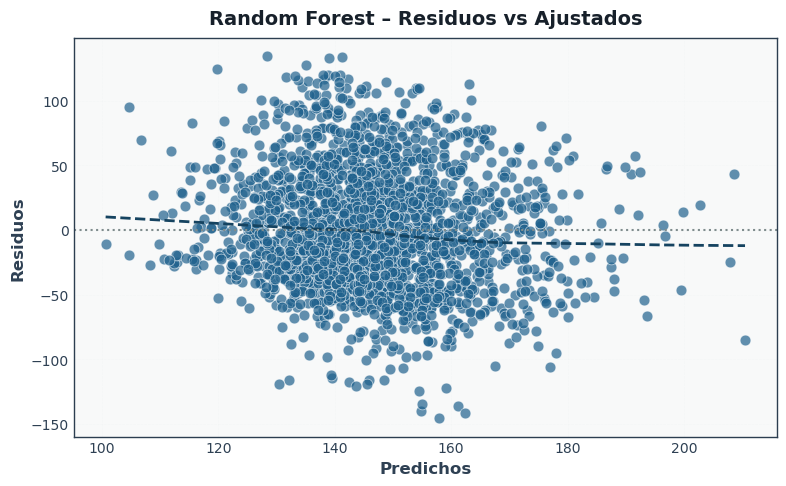

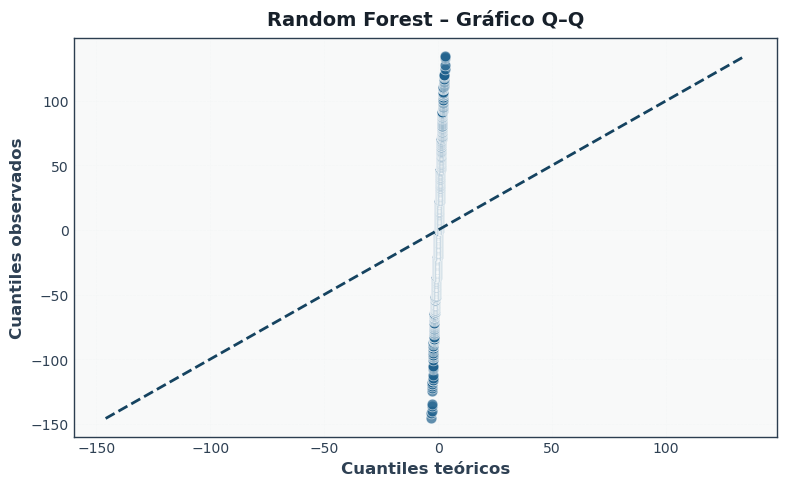

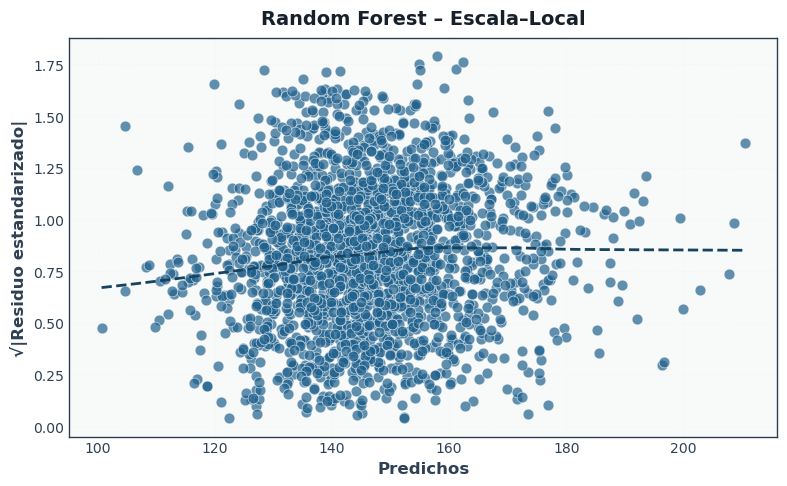

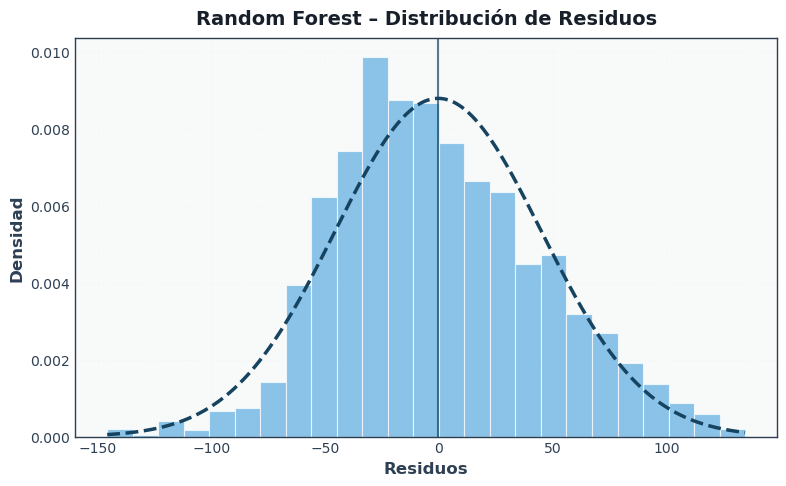

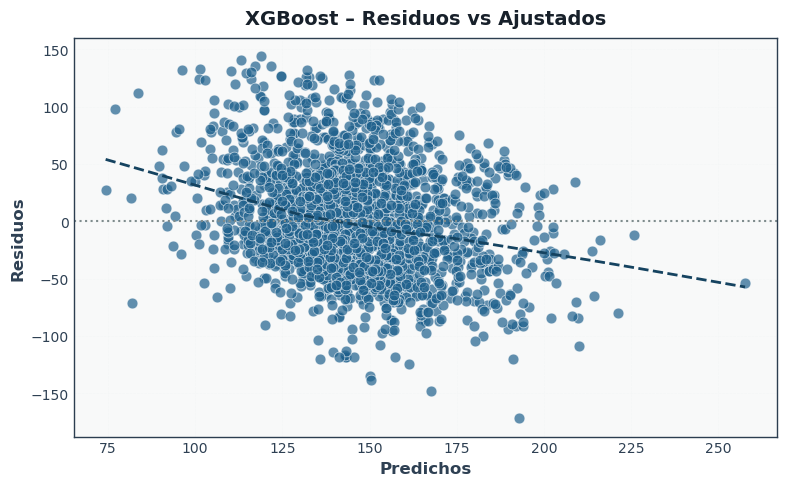

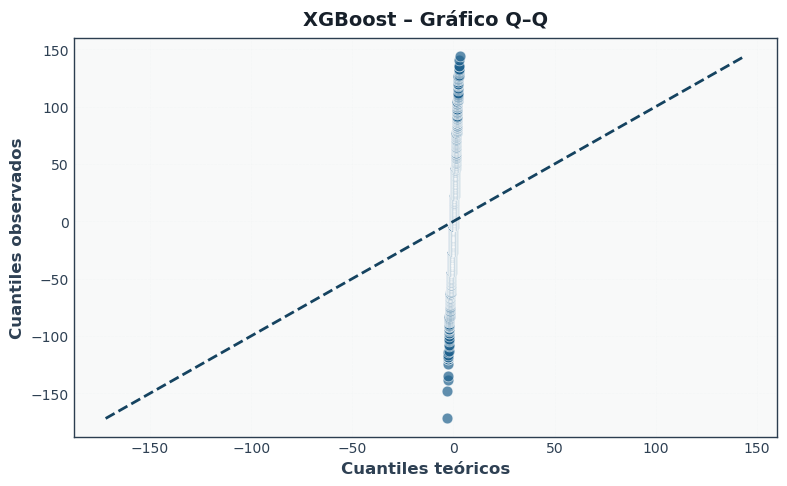

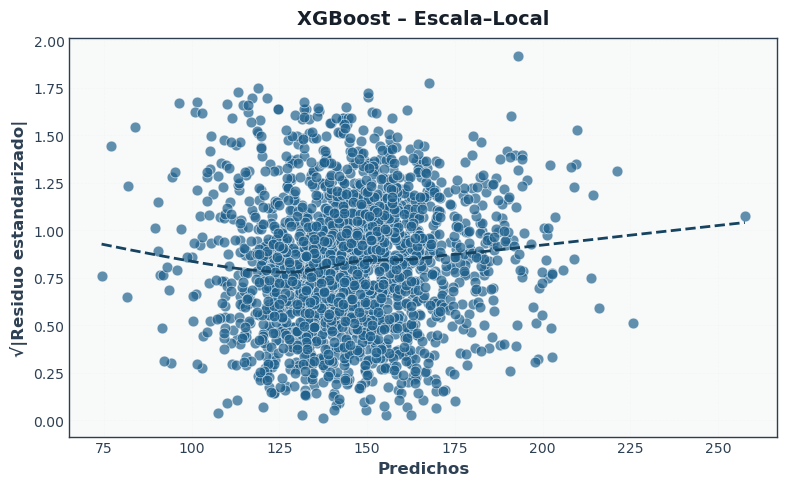

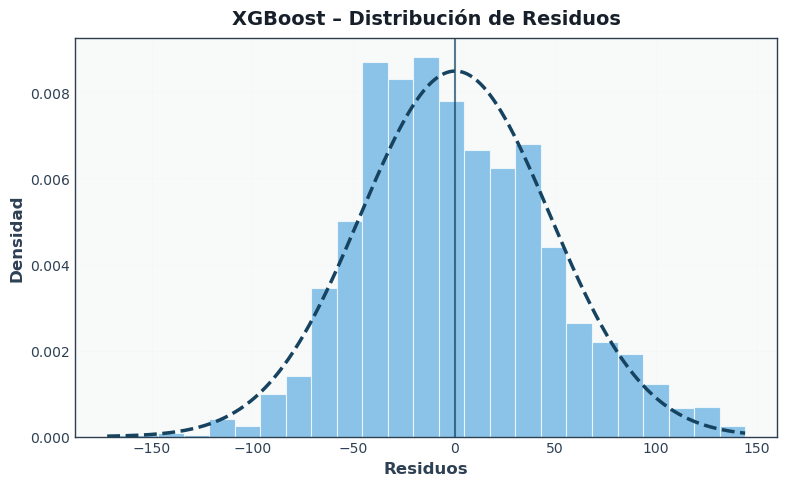

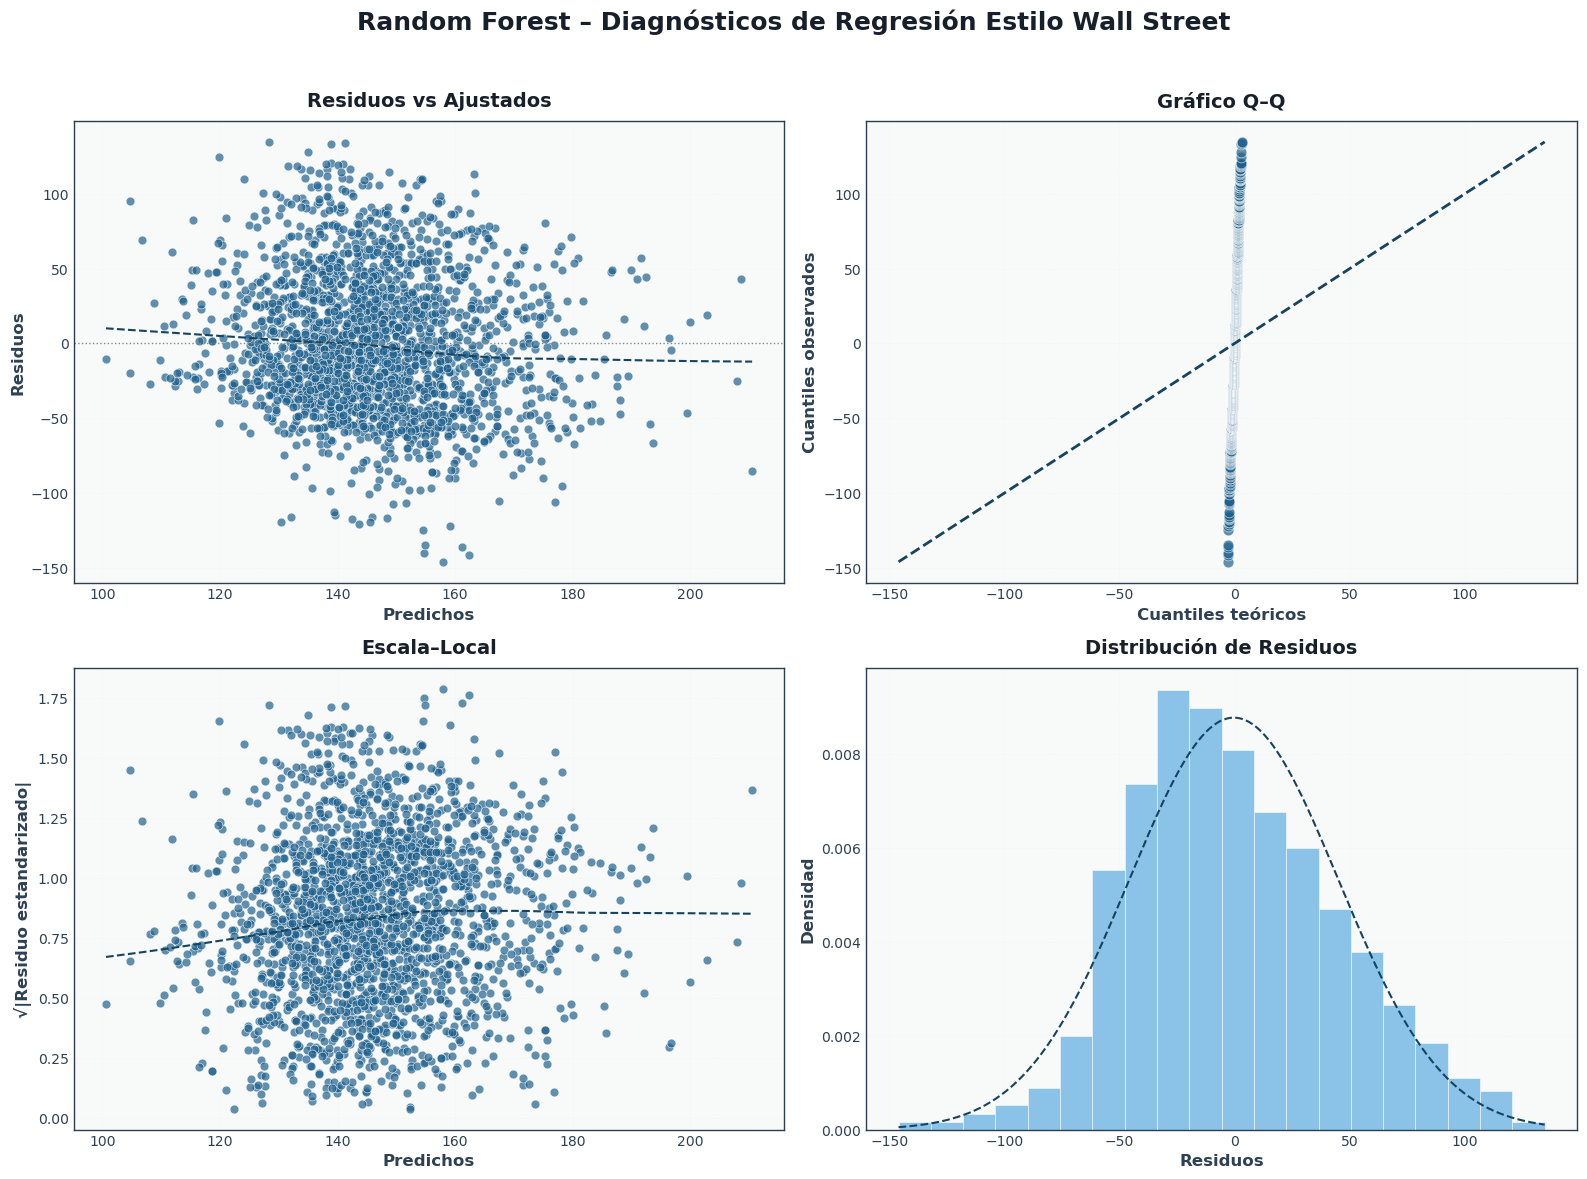

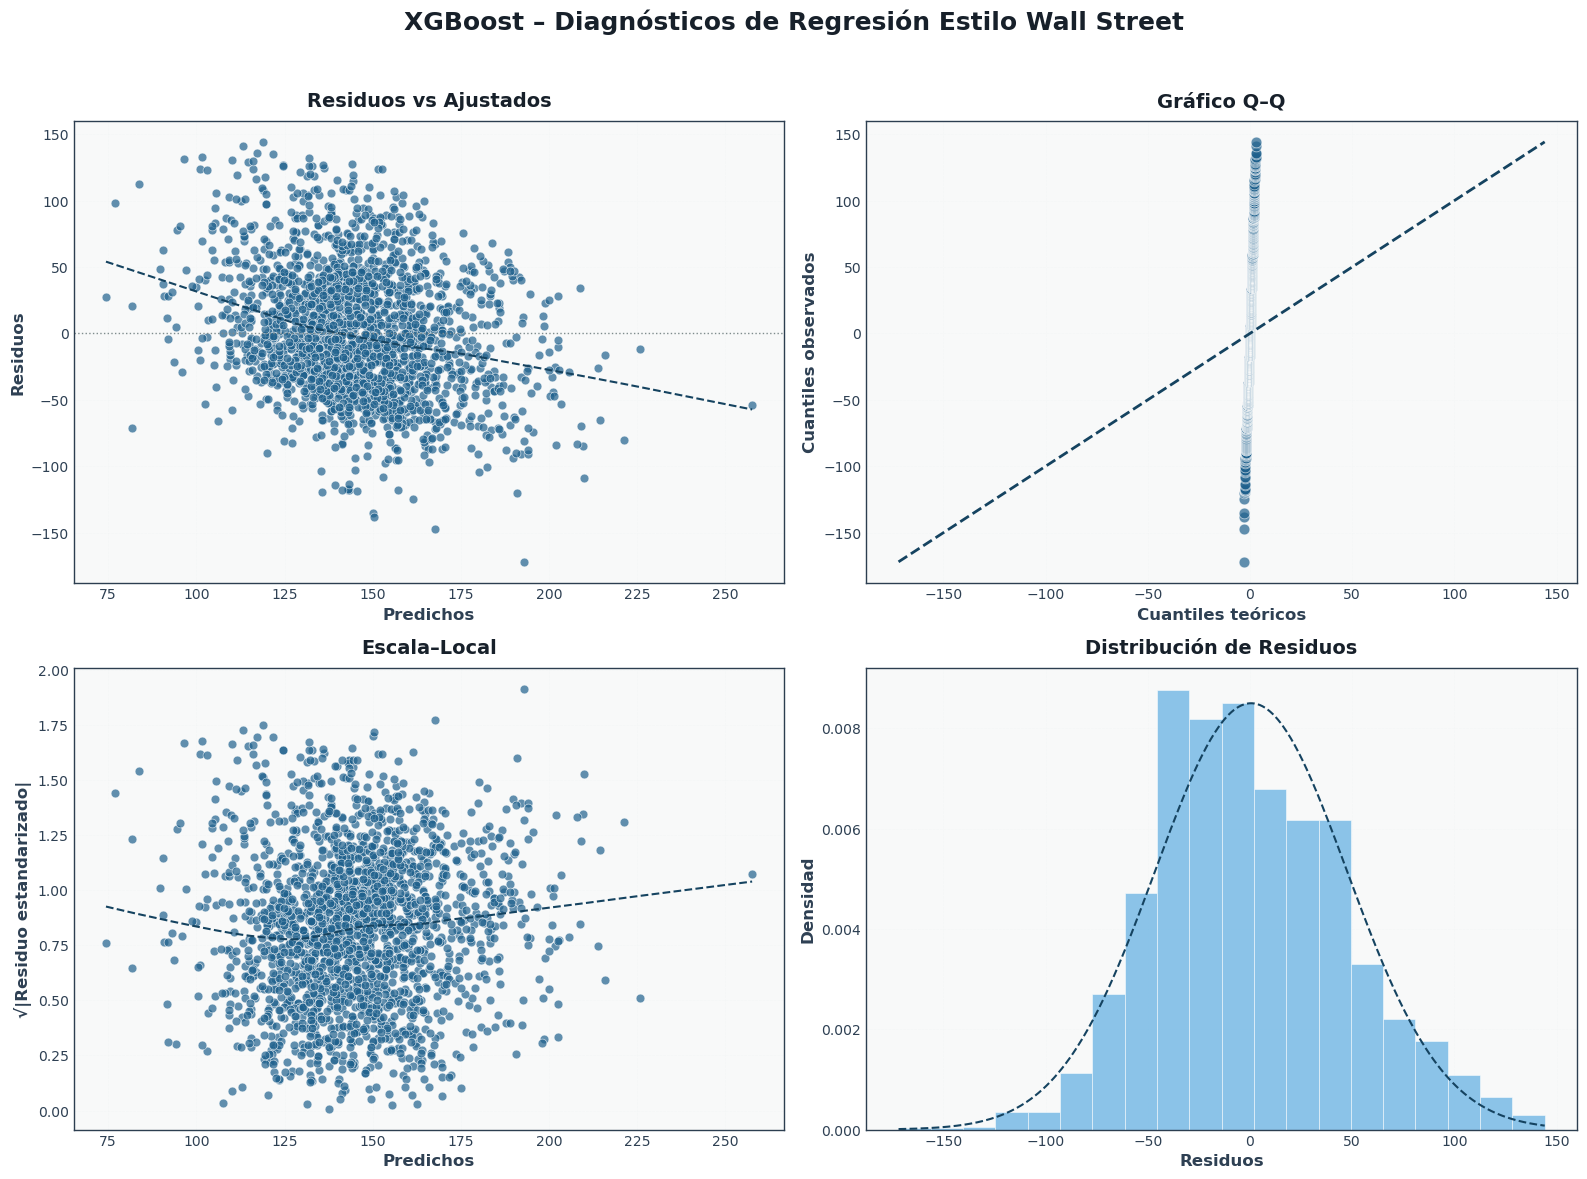

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from matplotlib.gridspec import GridSpec

# === Configuración de estilo "Wall Street" mejorado ===
plt.style.use('seaborn-v0_8-whitegrid')  # Base estilo seaborn como punto de partida

# Configuración de fuentes más profesionales - usando fuentes genéricas disponibles en todos los sistemas
plt.rcParams.update({
    'font.family': 'sans-serif',  # Cambiado de 'serif' a 'sans-serif' que está más disponible
    'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'],
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 16,
    'figure.dpi': 100,
    'figure.figsize': (8, 5),
    'axes.facecolor': 'white',
    'axes.edgecolor': '#2E4053',
    'axes.labelcolor': '#2E4053',
    'axes.grid': True,
    'grid.color': '#ECF0F1',
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    'xtick.color': '#2E4053',
    'ytick.color': '#2E4053',
    'text.color': '#2E4053',
    'figure.facecolor': 'white',
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1
})

# Paleta de azules para estilo financiero/Wall Street
col = {
    'puntos': '#1F618D',       # Azul oscuro para puntos
    'puntos_alpha': 0.7,       # Transparencia
    'lowess': '#154360',       # Azul más oscuro para líneas de tendencia
    'hist': '#5DADE2',         # Azul medio para histogramas
    'stem': '#2471A3',         # Azul intenso para gráficos de tallo
    'linea_cero': '#7F8C8D',   # Gris para líneas de referencia
    'titulo': '#17202A',       # Casi negro para títulos
    'grid': '#ECF0F1',         # Gris muy claro para cuadrículas
    'borde': '#2C3E50',        # Azul oscuro para bordes
    'fondo_panel': '#F8F9F9'   # Gris muy claro para fondo de paneles
}

def estilo_comun(ax, titulo):
    ax.set_facecolor(col['fondo_panel'])
    for spine in ax.spines.values():
        spine.set_color(col['borde'])
        spine.set_linewidth(1.0)
    ax.tick_params(axis='both', which='major', direction='in', length=5)
    ax.grid(True, alpha=0.3)
    ax.set_title(titulo, fontweight='bold', color=col['titulo'], pad=10)

def qqplot_custom(data, ax):
    q = np.linspace(0.001, 0.999, len(data))
    y = np.sort(data)
    x = stats.norm.ppf(q)
    ax.scatter(x, y, alpha=col['puntos_alpha'], color=col['puntos'], s=60, edgecolor='white', lw=0.5)
    mn, mx = min(x.min(), y.min()), max(x.max(), y.max())
    ax.plot([mn, mx], [mn, mx], linestyle='--', color=col['lowess'], lw=2)
    return ax

# === Paso 1: Preparar datos y dividir en train/test ===
df = best_of_five.copy()
y = df['minutes']
X = df.drop(columns=['minutes'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Paso 2: Definir y entrenar modelos ===
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='rmse')
}

results = {}
for name, mdl in models.items():
    mdl.fit(X_train, y_train)
    preds = mdl.predict(X_test)
    resid = y_test - preds
    # residuos estandarizados aproximados
    std_resid = (resid - resid.mean()) / resid.std()
    results[name] = {
        'fitted': preds,
        'resid': resid.values,
        'std_resid': std_resid.values
    }

# === Paso 3: Graficar diagnósticos por modelo ===
for name, res in results.items():
    fitted = res['fitted']
    resid = res['resid']
    std_resid = res['std_resid']

    # Residuals vs Fitted
    plt.figure(figsize=(8,5))
    ax = plt.gca()
    ax.scatter(fitted, resid, alpha=col['puntos_alpha'], color=col['puntos'], s=60, edgecolor='white', lw=0.5)
    low = sm.nonparametric.lowess(resid, fitted)
    ax.plot(low[:,0], low[:,1], linestyle='--', color=col['lowess'], lw=2)
    ax.axhline(0, linestyle=':', color=col['linea_cero'], lw=1.5)
    ax.set_xlabel("Predichos", fontweight='bold')
    ax.set_ylabel("Residuos", fontweight='bold')
    estilo_comun(ax, f"{name} – Residuos vs Ajustados")
    plt.tight_layout()
    plt.show()

    # Q–Q Plot
    plt.figure(figsize=(8,5))
    ax = plt.gca()
    qqplot_custom(resid, ax)
    ax.set_xlabel("Cuantiles teóricos", fontweight='bold')
    ax.set_ylabel("Cuantiles observados", fontweight='bold')
    estilo_comun(ax, f"{name} – Gráfico Q–Q")
    plt.tight_layout()
    plt.show()

    # Escala–Local
    plt.figure(figsize=(8,5))
    ax = plt.gca()
    ax.scatter(fitted, np.sqrt(np.abs(std_resid)), 
               alpha=col['puntos_alpha'], color=col['puntos'], s=60, edgecolor='white', lw=0.5)
    low2 = sm.nonparametric.lowess(np.sqrt(np.abs(std_resid)), fitted)
    ax.plot(low2[:,0], low2[:,1], linestyle='--', color=col['lowess'], lw=2)
    ax.set_xlabel("Predichos", fontweight='bold')
    ax.set_ylabel("√|Residuo estandarizado|", fontweight='bold')
    estilo_comun(ax, f"{name} – Escala–Local")
    plt.tight_layout()
    plt.show()

    # Histograma de residuos
    plt.figure(figsize=(8,5))
    ax = plt.gca()
    n, bins, patches = ax.hist(resid, bins=25, density=True, alpha=0.7,
                               color=col['hist'], edgecolor='white', lw=0.8)
    x = np.linspace(bins.min(), bins.max(), 500)
    y = stats.norm.pdf(x, loc=resid.mean(), scale=resid.std())
    ax.plot(x, y, linestyle='--', color=col['lowess'], lw=2.5)
    ax.axvline(resid.mean(), linestyle='-', color=col['lowess'], lw=1.5, alpha=0.7)
    ax.set_xlabel("Residuos", fontweight='bold')
    ax.set_ylabel("Densidad", fontweight='bold')
    estilo_comun(ax, f"{name} – Distribución de Residuos")
    plt.tight_layout()
    plt.show()

# === Paso 4: Panel combinado (solo residuos vs ajustados, Q–Q, escala-local e histograma) ===
for name, res in results.items():
    fitted, resid, std_resid = res['fitted'], res['resid'], res['std_resid']

    fig = plt.figure(figsize=(16,12))
    gs = GridSpec(2,2, figure=fig)
    axs = [fig.add_subplot(gs[0,0]), fig.add_subplot(gs[0,1]),
           fig.add_subplot(gs[1,0]), fig.add_subplot(gs[1,1])]

    # Resid vs Fitted
    axs[0].scatter(fitted, resid, alpha=col['puntos_alpha'], color=col['puntos'], s=40, edgecolor='white', lw=0.5)
    low = sm.nonparametric.lowess(resid, fitted)
    axs[0].plot(low[:,0], low[:,1], linestyle='--', color=col['lowess'], lw=1.5)
    axs[0].axhline(0, linestyle=':', color=col['linea_cero'], lw=1)
    axs[0].set_xlabel("Predichos", fontweight='bold'); axs[0].set_ylabel("Residuos", fontweight='bold')
    estilo_comun(axs[0], "Residuos vs Ajustados")

    # Q–Q
    qqplot_custom(resid, axs[1])
    axs[1].set_xlabel("Cuantiles teóricos", fontweight='bold'); axs[1].set_ylabel("Cuantiles observados", fontweight='bold')
    estilo_comun(axs[1], "Gráfico Q–Q")

    # Escala–Local
    axs[2].scatter(fitted, np.sqrt(np.abs(std_resid)),
                   alpha=col['puntos_alpha'], color=col['puntos'], s=40, edgecolor='white', lw=0.5)
    low2 = sm.nonparametric.lowess(np.sqrt(np.abs(std_resid)), fitted)
    axs[2].plot(low2[:,0], low2[:,1], linestyle='--', color=col['lowess'], lw=1.5)
    axs[2].set_xlabel("Predichos", fontweight='bold'); axs[2].set_ylabel("√|Residuo estandarizado|", fontweight='bold')
    estilo_comun(axs[2], "Escala–Local")

    # Histograma
    n, bins, patches = axs[3].hist(resid, bins=20, density=True, alpha=0.7,
                                   color=col['hist'], edgecolor='white', lw=0.5)
    x = np.linspace(bins.min(), bins.max(), 500)
    y = stats.norm.pdf(x, loc=resid.mean(), scale=resid.std())
    axs[3].plot(x, y, linestyle='--', color=col['lowess'], lw=1.5)
    axs[3].set_xlabel("Residuos", fontweight='bold'); axs[3].set_ylabel("Densidad", fontweight='bold')
    estilo_comun(axs[3], "Distribución de Residuos")

    fig.suptitle(f"{name} – Diagnósticos de Regresión Estilo Wall Street", 
                 fontsize=18, fontweight='bold', color=col['titulo'], y=0.98)
    plt.tight_layout(rect=[0,0,1,0.96])
    plt.show()
